In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

# Random Query Data

In [2]:
tag = 'saved/2020-05-20T11:45:17.201241'
conf_name ='init_only'

## Gasstation Characteristics

In [3]:
def get_init_data(tag, conf_name):
    # Paths to Benchmark Results
    result_dir = Path('./results').joinpath(tag, conf_name)
    return pd.read_csv(result_dir.joinpath('init.csv'))
        
init = get_init_data(tag, conf_name)

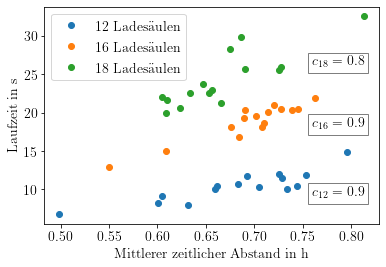

In [25]:
def plot_avg_distances(df, y):
    unique_num_cs = init['charging_stations'].unique()
    unique_num_cs.sort()
    text_pos = {
        12: [0.76, 9],
        16: [0.76, 18],
        18: [0.76, 26]
    }
    
    for num_cs in unique_num_cs[-3:]:
        _df = df[df['charging_stations'] == num_cs]
        _x = _df['av_cs_dist'] / 3600
        _y = _df[y] 
        plt.plot(_x, _y, 'o', label=f'{num_cs} Ladesäulen')
        txt_x, txt_y = text_pos[num_cs]
        plt.text(txt_x, 
                 txt_y, 
                 f'$c_{{{num_cs}}} = {_x.corr(_y):.1f}$',
                bbox=dict(facecolor='white', alpha=0.5)
                )
    
    plt.legend()
    plt.xlabel('Mittlerer zeitlicher Abstand in h')
    plt.ylabel('Laufzeit in s')
    plt.savefig('img/average_distance.pdf')
    
plot_avg_distances(init, y='time_contracted_graph')